In [35]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib

In [36]:
path = '/Users/DonginKim/Documents/Datasets'
os.chdir(path)

In [37]:
df = pd.read_csv('iris.csv')
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [38]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [42]:
df['Species'].describe()  #n=50 for each speicies

count             150
unique              3
top       Iris-setosa
freq               50
Name: Species, dtype: object

In [44]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Scatter plot 

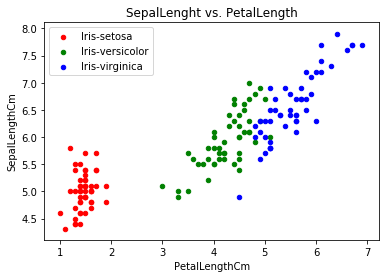

In [51]:
ax = df[df['Species'] == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='SepalLengthCm', color='red', \
                                             label='Iris-setosa', title="SepalLenght vs. PetalLength")

df[df['Species'] == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='SepalLengthCm', color='green', \
                                            label='Iris-versicolor', ax=ax)

df[df['Species'] == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='SepalLengthCm', color='blue', \
                                           label='Iris-virginica', ax=ax)

# Easier way 

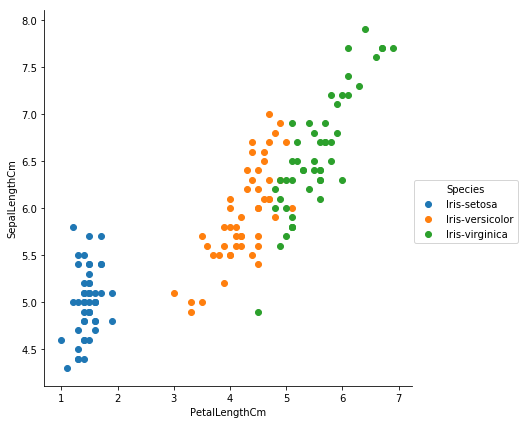

In [50]:
sns.FacetGrid(df, hue='Species', size=6).map(plt.scatter, 'PetalLengthCm', 'SepalLengthCm').add_legend()

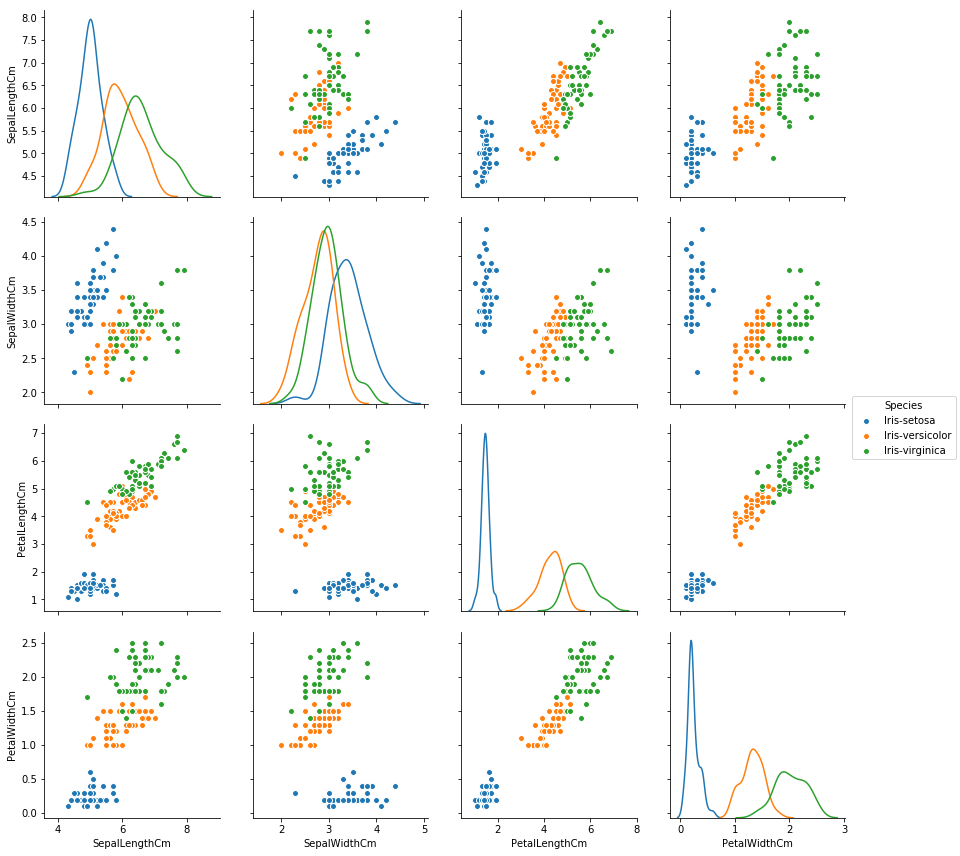

In [12]:
sns.pairplot(df, hue='Species', size=3, diag_kind='kde')

# Machine Learning

In [39]:
del df['Id']
def df['Species']

In [22]:
features_df = pd.get_dummies(df, columns=['Species'])
del features_df['SepalLengthCm']  #delete y value

In [24]:
features_df.tail()

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
145,3.0,5.2,2.3,0,0,1
146,2.5,5.0,1.9,0,0,1
147,3.0,5.2,2.0,0,0,1
148,3.4,5.4,2.3,0,0,1
149,3.0,5.1,1.8,0,0,1


In [26]:
X = features_df.as_matrix()
y = df['SepalLengthCm'].as_matrix()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [38]:
# Fit regression model / gradient boosting regressor 
model = ensemble.GradientBoostingRegressor(  

# Set up hyper parameters
    n_estimators=500,   #how many decision trees to build
    learning_rate=0.1,   #how much each additional decision tree influences the overall prediction
    max_depth=6,         #how many layers deep each individual decision tree can be
    min_samples_leaf=9,  # how many times a value must appear in our training set for a decision tree to make a decision based on it 
    max_features=0.1,    #the percentage of features in our model that we randomly choose to consider each time we create a branch in our decision tree.
    loss='huber',        #how scikit-learn calculates the model's error rate or cost as it learns
    random_state=0
)

# Train using the training data set
model.fit(X_train, y_train)  #y: correct answers, X: training features

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=6,
             max_features=0.1, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=9, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=0, subsample=1.0, verbose=0,
             warm_start=False)

In [40]:
# Save the trained model to a file so we can use it in other programs
joblib.dump(model, 'trained_house_classifier_model.pkl')

['trained_house_classifier_model.pkl']

In [39]:
# Find the error rate on the training set
mse = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

# Find the error rate on the test set
mse = mean_absolute_error(y_test, model.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

# To see the difference between two data sets

Training Set Mean Absolute Error: 0.1301
Test Set Mean Absolute Error: 0.3032


In [61]:
# Load the model we trained previously
model = joblib.load('trained_house_classifier_model.pkl')

# For the house we want to value, we need to provide the features in the exact same
# arrangement as our training data set.
features_list = [
    3.0,   # SepalWidthCm
    5.2,      # PetalLengthCm
    2.3,      # PetalWidthCm
    0,      # Species_Iris-setosa
    0,      # Species_Iris-versicolor 
    1   # Species_Iris-virginica
]

# scikit-learn assumes you want to predict the values for lots of houses at once, so it expects an array.
# We just want to look at a single house, so it will be the only item in our array.
sl_to_value = [
    features_list
]

In [62]:
# Run the model and make a prediction for each house in the homes_to_value array
predicted_home_values = model.predict(sl_to_value)

# Since we are only predicting the price of one house, just look at the first prediction returned
predicted_value = predicted_home_values[0]

print("Estimated Sepal Length: {:,.2f}Cm".format(predicted_value))


Estimated Sepal Length: 6.45Cm
